<a href="https://colab.research.google.com/github/GJ-007-sage/Astronomy/blob/main/Exoplanets_lightcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello Wonderful Person")

Hello Wonderful Person


The following command just installs the necessary package we are going to use today for data analysis


In [2]:
pip install lightkurve

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 43.2 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=139c1e024474e53ef46d7bb0cffce51ce3e6bb35132719c1ca3146b2c00acf00
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-a

Let us just go through with downloading some data for some random star, here we are taking from the kepler input catalog(KIC). The other place we can take data from is TESS.


In [3]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest');

In [4]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

In [5]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

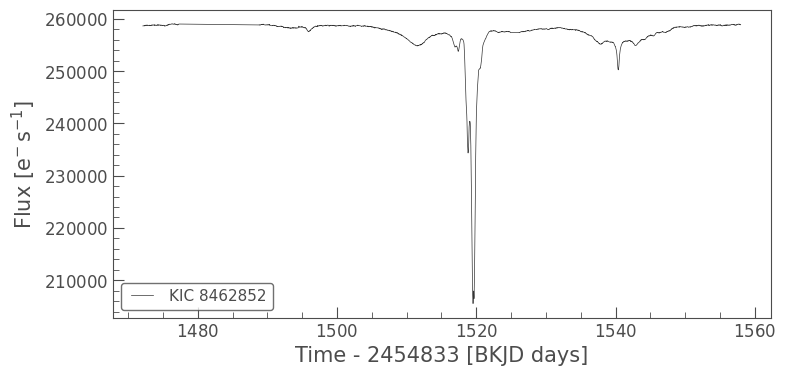

In [6]:
lc.plot()

Now, let us download the data of a star we know has a exoplanet. Let us still stick to KIC for now.

In [7]:
pixelFile = search_targetpixelfile('KIC 6922244', quarter=4).download()

/usr/local/lib/python3.10/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [8]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)

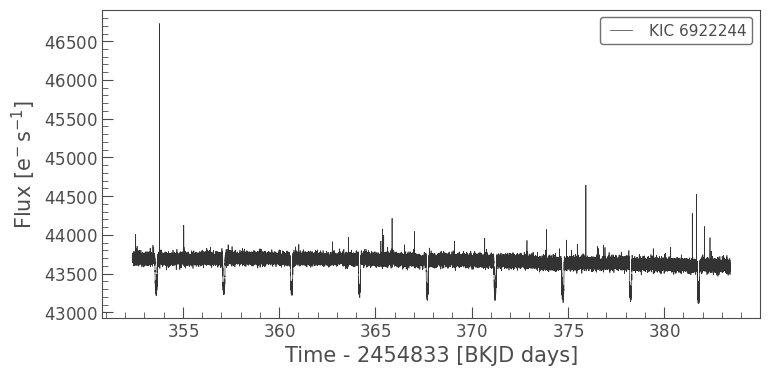

In [9]:
lc.plot();

We can see that this curve is tilting a bit down. This is because the telescope itself is shifting to the right. Therefore we shud account for this and process the data.

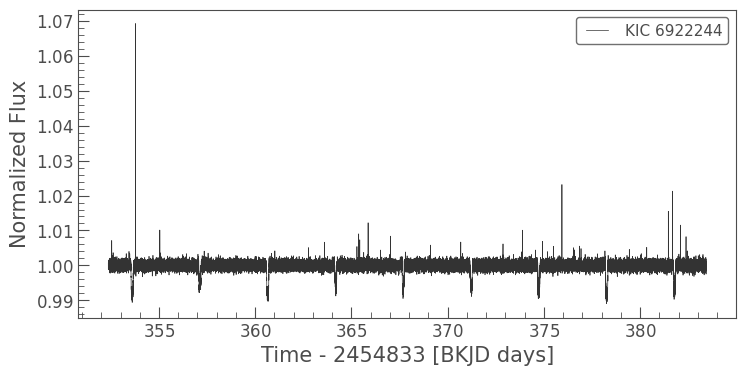

In [10]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

To find the time period of the planet

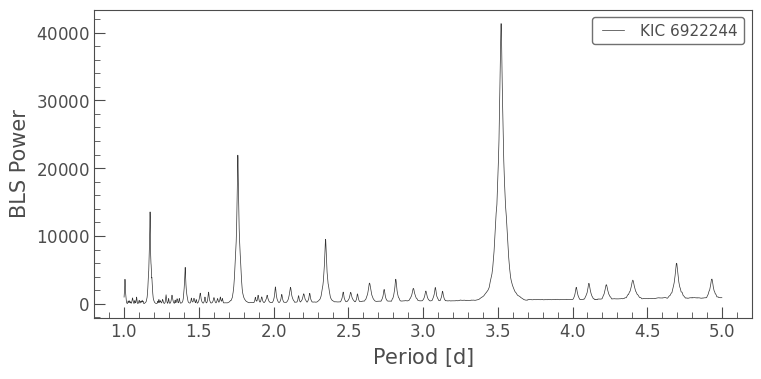

In [11]:
import numpy as np
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(1, 5, 0.001))
periodogram.plot();

In [12]:
periodogram.period_at_max_power

<Quantity 3.522 d>

Here we take segments of length "Period" and folding them over each other.

/usr/local/lib/python3.10/dist-packages/astropy/utils/decorators.py:603: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


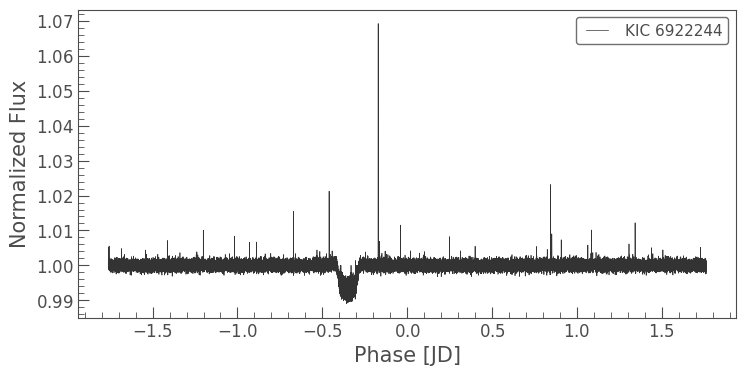

In [13]:
folded_lc = flat_lc.fold(period=3.522, t0=361)
folded_lc.plot();

Binning averages out it a bit

<ipython-input-14-1c8c31ee9084>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


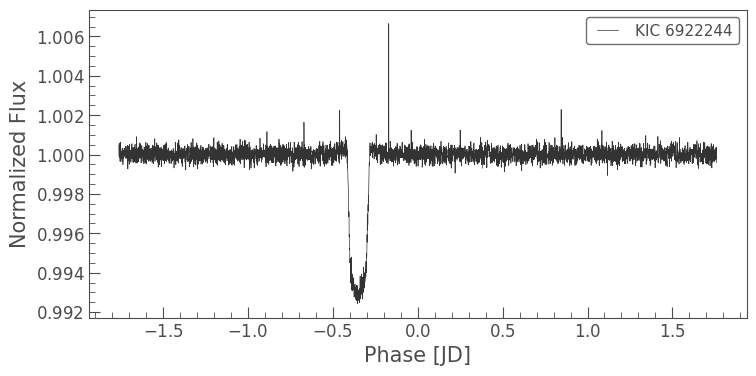

In [14]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot();

<ipython-input-15-bfa113d363b9>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();


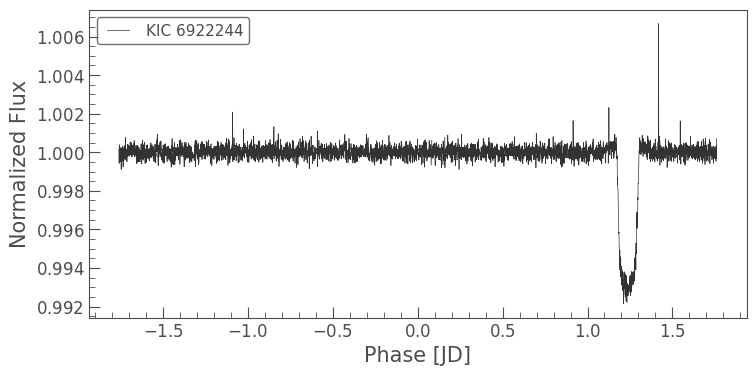

In [15]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();

Let us also see the lightcurve for a supernova

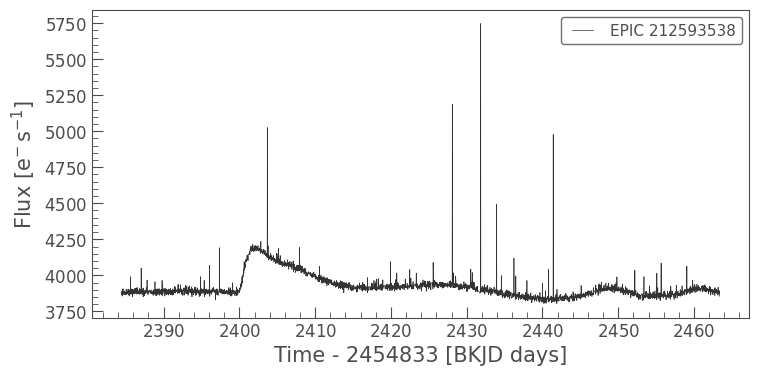

In [16]:
tpf = search_targetpixelfile('EPIC 212593538',campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot();

In [17]:
import lightkurve as lk
from lightkurve import search_targetpixelfile
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1,author='SPOC')
print(search_result)
tpf = search_result.download(quality_bitmask='default')

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 01 2018   SPOC     120   261136679      0.0


In [18]:
tpf.mission
tpf.targetid

261136679

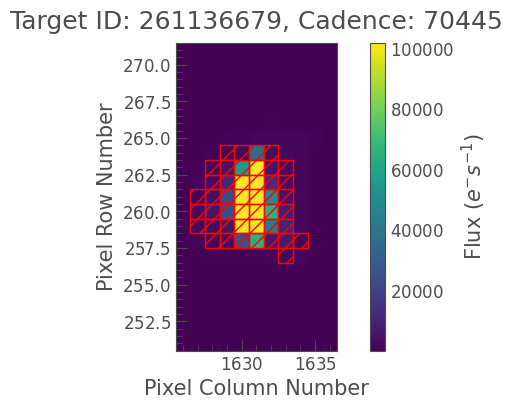

In [19]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

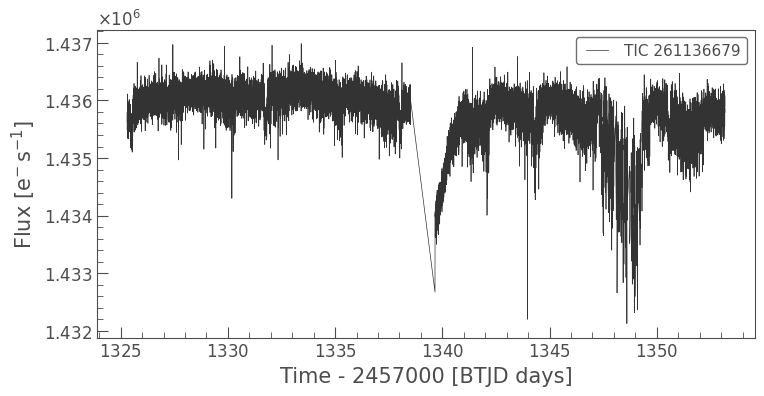

In [20]:
lc = tpf.to_lightcurve()
lc.plot();

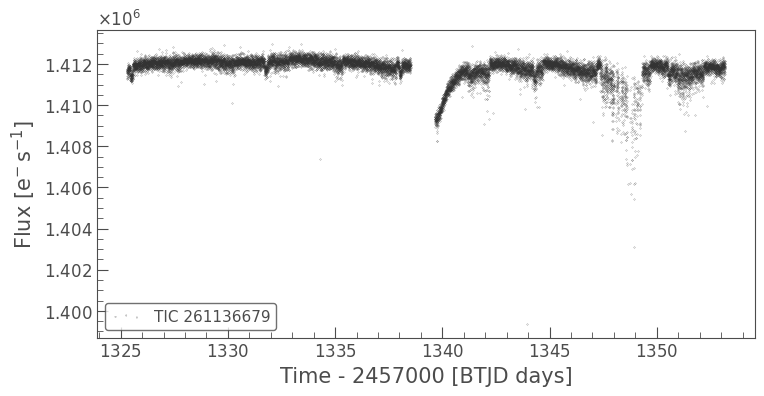

In [21]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter(s=0.1);

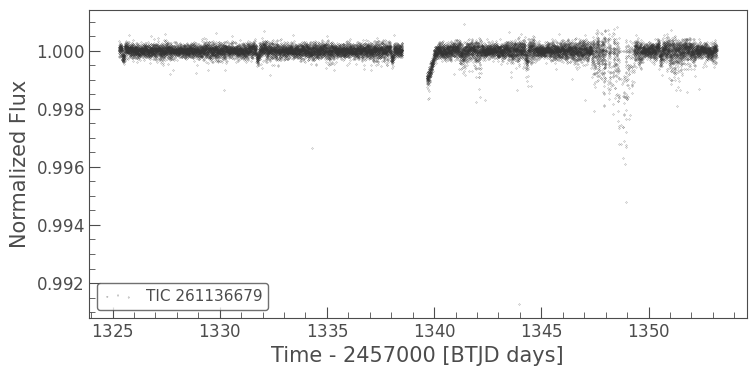

In [22]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.scatter(s= 0.1);

18279


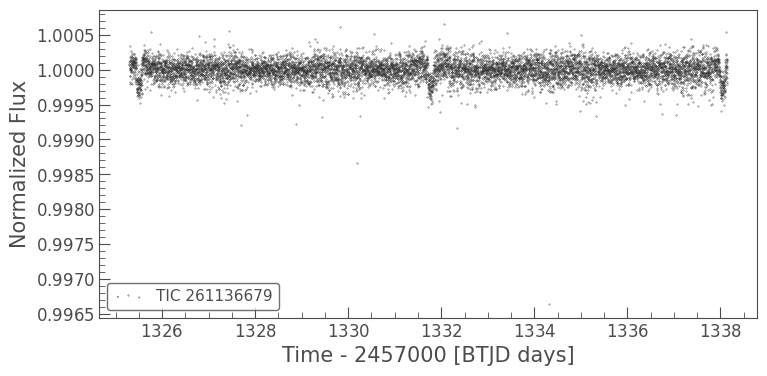

In [23]:
print(len(flat_lc.time))

masked_lc = flat_lc[0:int(5*(len(flat_lc.time))/10)]
masked_lc.scatter(s=0.3);

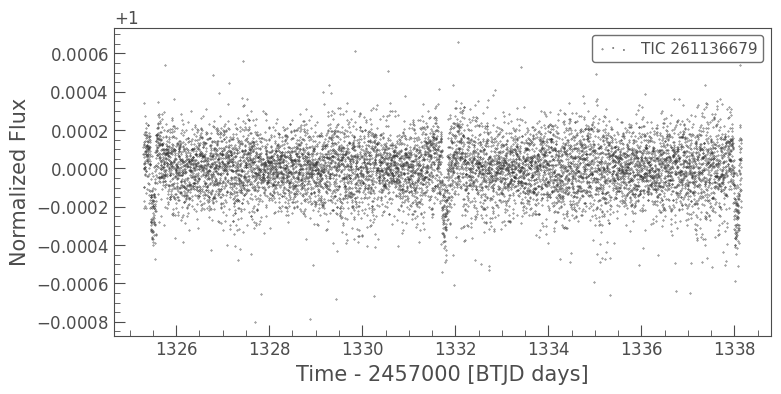

In [24]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.4);

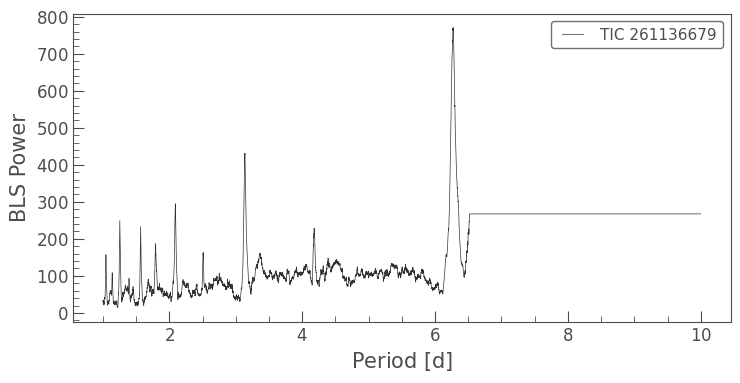

In [25]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot();

In [26]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 6.276 d


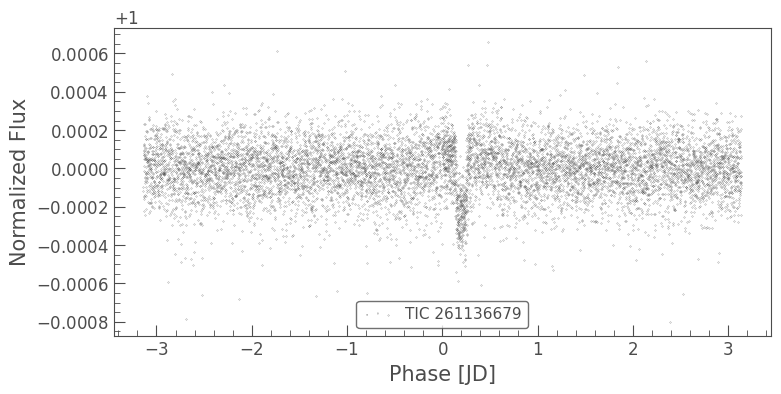

In [27]:
folded_lc = clipped_lc.fold(period=6.276)
folded_lc.scatter(s=0.1);

<ipython-input-28-1c8c31ee9084>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


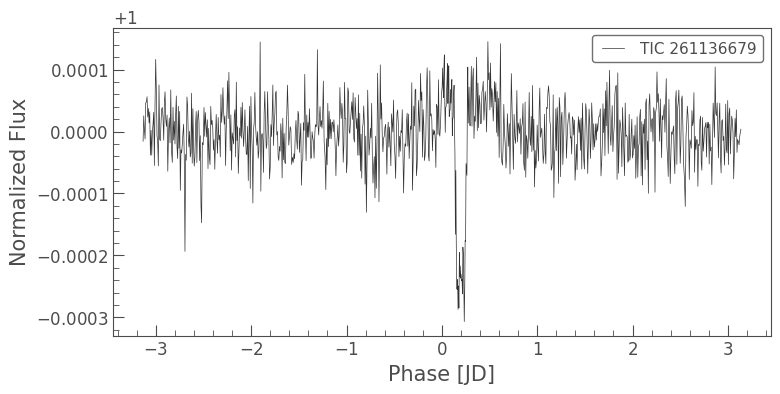

In [28]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot();

We will now search for stars that might not be in this.
we will be reading data from Tess CTL(candidate target list)

In [38]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk


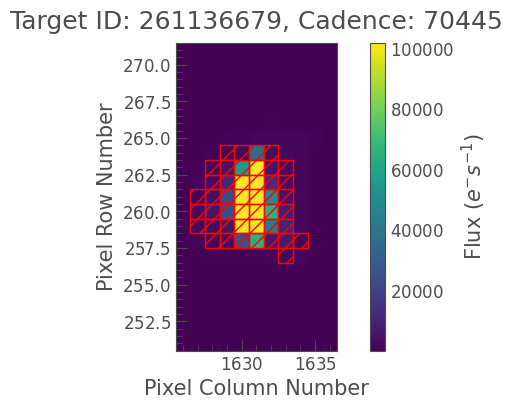

In [31]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

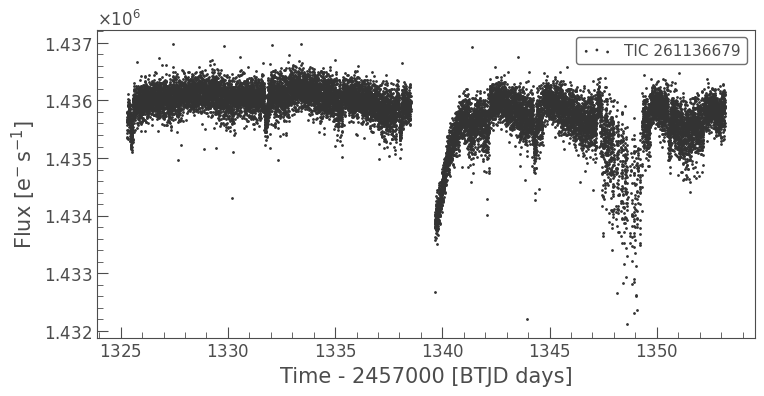

In [32]:
lc = tpf.to_lightcurve()
lc.scatter();

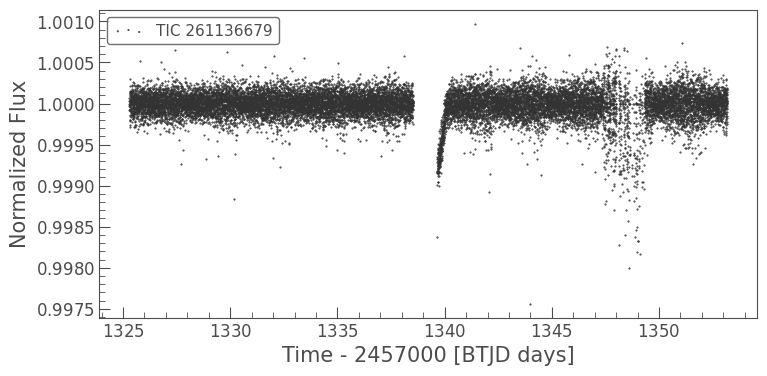

In [33]:
flat_lc = lc.flatten()
flat_lc.scatter(s=1);

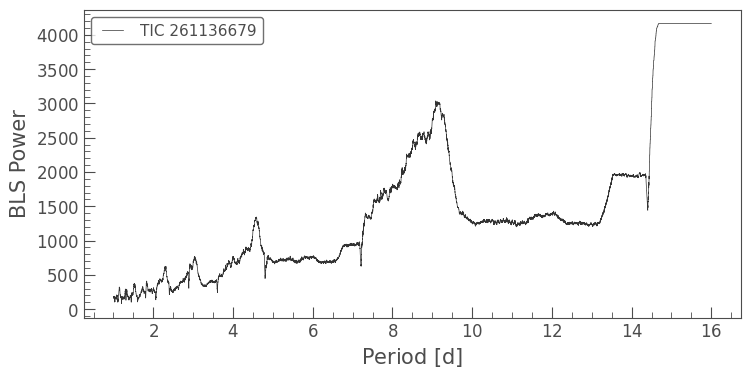

In [34]:
import numpy as np
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(1, 16, 0.001))
periodogram.plot();

In [35]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 15.968 d


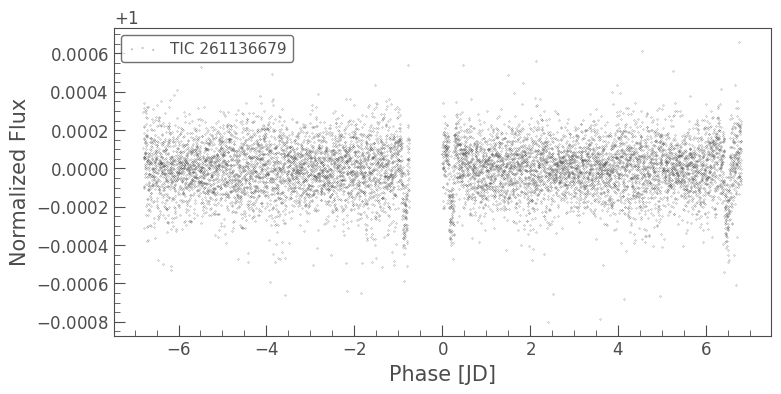

In [36]:
folded_lc = clipped_lc.fold(period=13.6)
folded_lc.scatter(s=0.11);

<ipython-input-37-f3594b70f914>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


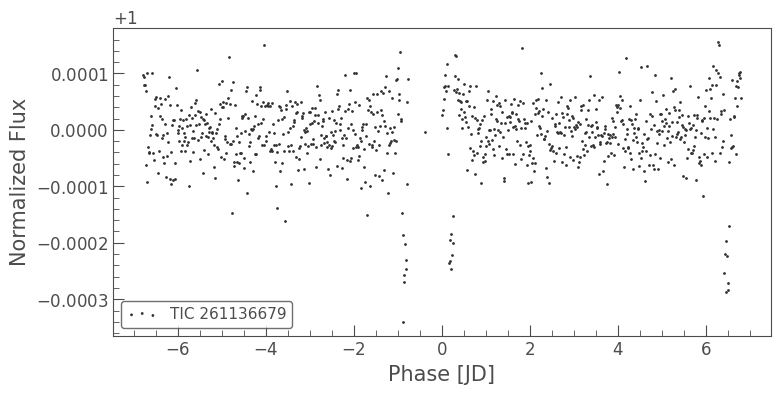

In [37]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.scatter();